In [ ]:
# Importamos las librerías necesarias
import pandas as pd # Utilizar la biblioteca Pandas
import matplotlib as mpl # Utilizar la biblioteca Matplotlib, que es una herramienta de visualización de datos
import matplotlib.pyplot as plt # Interfaz de usuario orientada a objetos (OO) de la biblioteca Matplotlib
import matplotlib.dates as mdates # Utilizar el módulo mdates dentro de la biblioteca Matplotlib, que proporciona funciones y clases específicas para trabajar con fechas y horas en gráficos y visualizaciones de series temporales.
import seaborn as sns #  Utilizar la biblioteca Seaborn, que es una extensión de Matplotlib diseñada para crear visualizaciones estadísticas atractivas y eficientes
import numpy as np # utilizar la biblioteca NumPy


from sklearn.preprocessing import LabelEncoder # Utilizar esta herramienta en la tarea de codificar etiquetas categóricas en variables numéricas

# **Abstract**

# Contexto Comercial - Motivación

El análisis de precios y la formulación de estrategias son aspectos cruciales para el éxito y la sostenibilidad de una empresa en el competitivo entorno comercial. Estos elementos no solo afectan los ingresos y la rentabilidad, sino que también desempeñan un papel fundamental en la percepción de valor por parte de los clientes.
Algunos puntos clave que destacan la importancia de este análisis en el contexto empresarial son:

- Maximización de ingresos y rentabilidad:
Un enfoque con importante foco en la fijación de precios permite a una empresa maximizar sus ingresos y rentabilidad. Establecer precios adecuados implica considerar costos, demanda y disposición de los clientes a pagar.

- Competitividad en el mercado:
Analizar constantemente los precios ayuda a mantenerse competitivo en el mercado. Identificar las estrategias de precios de la competencia se vuelve clave para ofrecer un valor diferenciado.

- Percepción de valor del cliente:
La forma en que se establecen los precios influye directamente en la percepción de valor por parte de los clientes. Precios demasiado bajos pueden dar la impresión de baja calidad, mientras que precios demasiado altos pueden alejar a los clientes. El análisis de precios ayuda a encontrar el equilibrio adecuado que refleje la calidad del producto o servicio.

- Adaptación a cambios en el mercado:
Los mercados están en constante cambio, ya sea debido a factores económicos, tendencias del consumidor o avances tecnológicos. Las estrategias de precios deben ser flexibles y capaces de adaptarse a estos cambios para mantener la relevancia y aprovechar nuevas oportunidades.

- Segmentación de mercado y personalización:
Analizar los datos del mercado permite identificar diferentes segmentos de clientes con diversas sensibilidades al precio. La capacidad de personalizar las estrategias de precios para diferentes segmentos mejora la atracción y retención de clientes.

- Fidelización de clientes:
Una estrategia de precios efectiva no se trata solo de adquirir nuevos clientes, sino también de retener a los existentes. Ofrecer programas de descuentos, promociones y precios justos contribuye a la lealtad del cliente a largo plazo.


En resumen, el análisis de precios y la formulación de estrategias son elementos fundamentales que influyen en diversos aspectos de una empresa. Desde la captación de clientes hasta la gestión eficiente de costos, una estrategia de precios bien pensada contribuye significativamente al éxito a largo plazo y a la sostenibilidad en el mercado.



# **Problema Comercial**

Partiendo de una base de datos que desglosa los productos junto con sus precios de venta diarios en diversas tiendas, hemos identificado una variabilidad significativa en los precios de un mismo artículo entre los diferentes establecimientos. Este fenómeno se ve acentuado por las fluctuaciones a lo largo del tiempo, las cuales podrían estar vinculadas a factores como la estacionalidad, la disponibilidad del producto y las ofertas específicas por zona.

La heterogeneidad observada en los precios entre las tiendas sugiere la existencia de factores que van más allá de los costos inherentes al producto. Esta disparidad en los precios plantea un desafío comercial, ya que la falta de uniformidad dificulta la formulación de estrategias de fijación de precios coherentes y eficientes.

# **Objetivo**

Con el objetivo de optimizar la fijación de precios, proponemos desarrollar un modelo predictivo que estime el precio óptimo de cada producto. Este enfoque se basa en el análisis del comportamiento pasado de los precios. Además de la tienda y el precio del producto, se considerarán diferentes variables, como el tipo de tienda, el tipo (perfil) del cliente, tipo de compra, la categoría del producto , el momento del día y de la semana en que se realiza la compra, entre otras.

La heterogeneidad en los precios entre tiendas sugiere la existencia de factores que van más allá de los costos inherentes al producto. La incorporación de variables como el tipo de tienda y el perfil del cliente pretende capturar estas complejidades, permitiendo una comprensión más profunda de los determinantes del precio. Asimismo, la inclusión de información temporal, como el momento específico del día y de la semana en que se realiza la compra, busca identificar patrones estacionales y comportamientos de consumo que puedan influir en la fijación de precios.

Este enfoque busca no solo predecir los precios futuros, sino también entender las dinámicas subyacentes que impulsan las variaciones en los precios. Al considerar un conjunto diverso de variables, se aspira a desarrollar un modelo robusto que no solo sea preciso en sus predicciones, sino que también brinde insights valiosos para la toma de decisiones estratégicas en la fijación de precios en el entorno analizado.



# **Contexto analítico**

**Cargamos base de datos desde Google Drive (.csv)**


Conjunto de datos que contiene información sobre ventas y pedidos de un conjunto de tiendas en Santiago, Chile.

Se dispone de información entre Setiembre 2022 y Setiembre 2023


**Variables**


fecha: año/mes/día en que se realiza pedido

ano_mes: año/mes en que se realiza pedido

dia_semana: día de la semana en que se realiza pedido, siendo 1 el domingo

hora: hora en que se realiza pedido, siendo 0 las 12 am

ciudad:cuidad en la cual se realiza pedido

tienda_id: identificador unico de la tienda

tipo_tienda: clasifica a las tiendas según dos tipos: Supermercado (tiendas más grandes) y Minimercados (tiendas más pequeñas)

tienda_importante: boleano que toma valor 1 si tienda es considerada importante dentro de la región

user_id: identificador de usuario

tipo_cliente:clasifica al cliente según frecuencia de compra en nuevo, recurrente, e intermitente

order_id: identificador de ticket

tipo_compra: clasifica la compra según cantidad de prodcutos que componen el pedido en urgencia, reposicion y abastecimiento

identificar_producto: identificador unico por producto, no varía por tienda

nombre_producto: nombre de producto

tipo_producto: categorización de producto

unidades: cantidad de unidades vendidas

precio_unitario: precio unitario en moneda local sin descuentos

producto_con_descuento: boleano que identica si producto al momento de la compra tenia descuento o no

importe_descuento: importe que fue descontando del precio unitario del producto por concepto de descuento


In [ ]:
# Nos conectamos a Google Drive para cargar base de datos
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Cargamos base de datos
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('base_curso_coder_2023.csv',sep=',')

# Imprimimos cabezales
df.head(5)

Mounted at /content/gdrive
/content/gdrive/MyDrive


,fecha,ano_mes,dia_semana,hora,ciudad,tienda_id,tipo_tienda,tienda_importante,user_id,tipo_cliente,order_id,tipo_compra,identificar_producto,nombre_producto,tipo_producto,unidades,precio_unitario,producto_con_descuento,importe_descuento
0,2023-01-03,2023-01,3,18,Santiago,254750,Minimercados,0,184104,nuevo,706388799,abastecimiento,11210007253,Salsa Pimienta Garlic 60 Ml Tabasco,Empaquetados,1,4480.0,1,2688.0
1,2022-09-24,2022-09,7,9,Santiago,254746,Minimercados,0,41667831,recurrente,641752801,abastecimiento,11210009530,Salsa Verde Frasco 60 Ml Tabasco,Empaquetados,1,4480.0,0,NaN
2,2022-12-22,2022-12,5,21,Santiago,184439,Supermercado,0,79653561,nuevo,699608748,reposicion,12546310512,Chicle Menta Fuerte 60 Un Dentyne,Snacks,1,4190.0,1,628.5
3,2023-02-18,2023-02,7,17,Santiago,191748,Supermercado,0,52266495,recurrente,754583888,reposicion,12546312417,Chicle Dentyne Ice Art Chill 16 Unidades,Snacks,1,1240.0,0,NaN
4,2022-09-04,2022-09,1,19,Santiago,184439,Supermercado,0,46271943,intermitente,629649390,urgencia,12546315012,Chicle Spearmint Verde 16 Un Dentyne,Snacks,1,1240.0,0,NaN


**Descripción general del conjunto de datos:**

In [ ]:
# Número de filas y columnas
num_filas, num_columnas = df.shape

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 5012810
Número de columnas: 19


In [ ]:
# Identificamos tipo de dato de cada variable
tipos_de_datos = df.dtypes
print(tipos_de_datos)

fecha                      object
ano_mes                    object
dia_semana                  int64
hora                        int64
ciudad                     object
tienda_id                   int64
tipo_tienda                object
tienda_importante           int64
user_id                     int64
tipo_cliente               object
order_id                    int64
tipo_compra                object
identificar_producto        int64
nombre_producto            object
tipo_producto              object
unidades                    int64
precio_unitario           float64
producto_con_descuento      int64
importe_descuento         float64
dtype: object




---


**PROCESO DE LIMPIEZA DE DATOS**

**Identificamos variables con valores nulos**

In [ ]:
# utilizamos función isnull para esto
valores_nulos = df.isnull().sum()
print(valores_nulos)

fecha                           0
ano_mes                         0
dia_semana                      0
hora                            0
ciudad                          0
tienda_id                       0
tipo_tienda                     0
tienda_importante               0
user_id                         0
tipo_cliente                    0
order_id                        0
tipo_compra                     0
identificar_producto            0
nombre_producto                 0
tipo_producto                   0
unidades                        0
precio_unitario                 0
producto_con_descuento          0
importe_descuento         4220520
dtype: int64


La cantidad de valores nulos en la variable "importe_descuento" se debe a que si el producto no estuvo en promoción, este campo está vacío ya que no tuvo descuento. Por lo tanto, a continuación, importamos un valor de 0 para estos casos.

In [ ]:
# Imputamos 0 en aquellas observaciones donde importe_descuento estaba vacio
df['importe_descuento'].fillna(0, inplace=True)

**Identificamos outliers en nuestras variables de precios**

Dado que nuestros precios son variables cruciales para el análisis y modelado, es fundamental identificar y tratar los valores atípicos. Para ello, determinaremos el valor de precio en el cual se acumulan el 5% y el 95% de las observaciones para cada producto. Posteriormente, eliminaremos del dataframe las filas cuyos precios estén por debajo del percentil 5 o por encima del percentil 95.

In [ ]:
# Obtenemos la lista de productos únicos del DataFrame
lista_productos = df['identificar_producto'].unique()

# Creamos un DataFrame vacío para almacenar los resultados
df_resultado = pd.DataFrame()

# Iteramos sobre la lista de productos y eliminamos las filas con precios fuera del rango
for producto in lista_productos:
    df_producto = df[df['identificar_producto'] == producto]  # Filtramos datos para un producto específico

    # Obtenemos cuantiles 0.05 y 0.95 para cada producto
    cuantil_05 = df_producto['precio_unitario'].quantile(0.05)
    cuantil_95 = df_producto['precio_unitario'].quantile(0.95)

    # Filtramos ventas por producto que estén dentro del rango
    df_no_outside_range = df_producto[(df_producto['precio_unitario'] >= cuantil_05) & (df_producto['precio_unitario'] <= cuantil_95)]

    # Concatenamos el resultado al DataFrame final
    df_resultado = pd.concat([df_resultado, df_no_outside_range], ignore_index=True)


In [ ]:
# Nuevo número de filas y columnas post tratamiento outliers
num_filas, num_columnas = df_resultado.shape

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 4854751
Número de columnas: 19


Después de detectar y eliminar valores atípicos, notamos una reducción en la cantidad de filas en el dataframe.

**Identificamos si existen filas duplicadas**

In [ ]:
# Utilizamos el método duplicated() para identificar filas duplicadas
duplicados = df[df.duplicated()]

# Mostrar los duplicados
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
Empty DataFrame
Columns: [fecha, ano_mes, dia_semana, hora, ciudad, tienda_id, tipo_tienda, tienda_importante, user_id, tipo_cliente, order_id, tipo_compra, identificar_producto, nombre_producto, tipo_producto, unidades, precio_unitario, producto_con_descuento, importe_descuento]
Index: []


No identificamos ninguna fila duplicada en nuestro dataframe, esto indica que no hay observaciones exactamente iguales en el conjunto de datos, lo que es un resultado positivo en términos de calidad y consistencia de los datos.



---


**RESUMEN ESTADISTICO**

In [ ]:
# descriptivos generales
descripcion_general = df.describe()
pd.set_option('display.float_format', '{:,.2f}'.format)

print(descripcion_general)

        dia_semana         hora    tienda_id  tienda_importante       user_id  \
count 5,012,810.00 5,012,810.00 5,012,810.00       5,012,810.00  5,012,810.00   
mean          4.02        16.36   209,083.23               0.13 30,728,058.96   
std           2.07         3.89    65,623.31               0.34 25,184,650.85   
min           1.00         0.00    59,100.00               0.00        233.00   
25%           2.00        13.00   177,676.00               0.00  8,014,338.00   
50%           4.00        17.00   191,748.00               0.00 25,325,103.00   
75%           6.00        20.00   270,614.00               0.00 49,362,384.00   
max           7.00        23.00   459,794.00               1.00 96,801,755.00   

            order_id  identificar_producto     unidades  precio_unitario  \
count   5,012,810.00          5,012,810.00 5,012,810.00     5,012,810.00   
mean  809,104,367.63  6,472,039,227,525.57         1.65         2,269.75   
std   111,827,796.86  2,541,605,996,325.38

In [ ]:
# cantidad de observaciones por tipo cliente
conteo_valores_tipo_cliente = df['tipo_cliente'].value_counts()
print(conteo_valores_tipo_cliente)

tipo_cliente
recurrente      3257513
intermitente    1006903
nuevo            748394
Name: count, dtype: int64


In [ ]:
# cantidad de observaciones por tipo compra
conteo_valores_tipo_compra = df['tipo_compra'].value_counts()
print(conteo_valores_tipo_compra)

tipo_compra
abastecimiento    1970363
reposicion        1854341
urgencia          1188101
otro                    5
Name: count, dtype: int64


In [ ]:
# cantidad de observaciones por tipo tienda
conteo_valores_tipo_tienda = df['tipo_tienda'].value_counts()
print(conteo_valores_tipo_tienda)

tipo_tienda
Supermercado    4383658
Minimercados     629152
Name: count, dtype: int64


In [ ]:
# cantidad de observaciones por tipo producto
conteo_valores_tipo_producto = df['tipo_producto'].value_counts()
print(conteo_valores_tipo_producto)

tipo_producto
Snacks                  816784
Lacteos y derivados     795438
Frutas y Verduras       666432
Bebidas                 615871
Empaquetados            554405
Panaderia               444645
Hogar y mascotas        288043
Cigarrillos y tabaco    234223
Congelados              227186
Cuidado personal        143469
Carnes y pescado        126949
Listo para consumir      53569
Bebidas Alcoholicas      36658
Productos varios          9138
Name: count, dtype: int64


## Principales Insights generales de nuestra base de datos

**Gráfico de evolución de cantidad de órdenes por año-mes**

In [ ]:
# Agrupamos los datos de forma tal de obtener las ordenes por año-mes
df_ordenes_por_ano_mes = df.groupby(['ano_mes'])['order_id'].nunique().to_frame(name = 'ordenes').reset_index()

In [ ]:
# Definimos variables 'x' y 'y'
x = df_ordenes_por_ano_mes.ano_mes
y = df_ordenes_por_ano_mes.ordenes

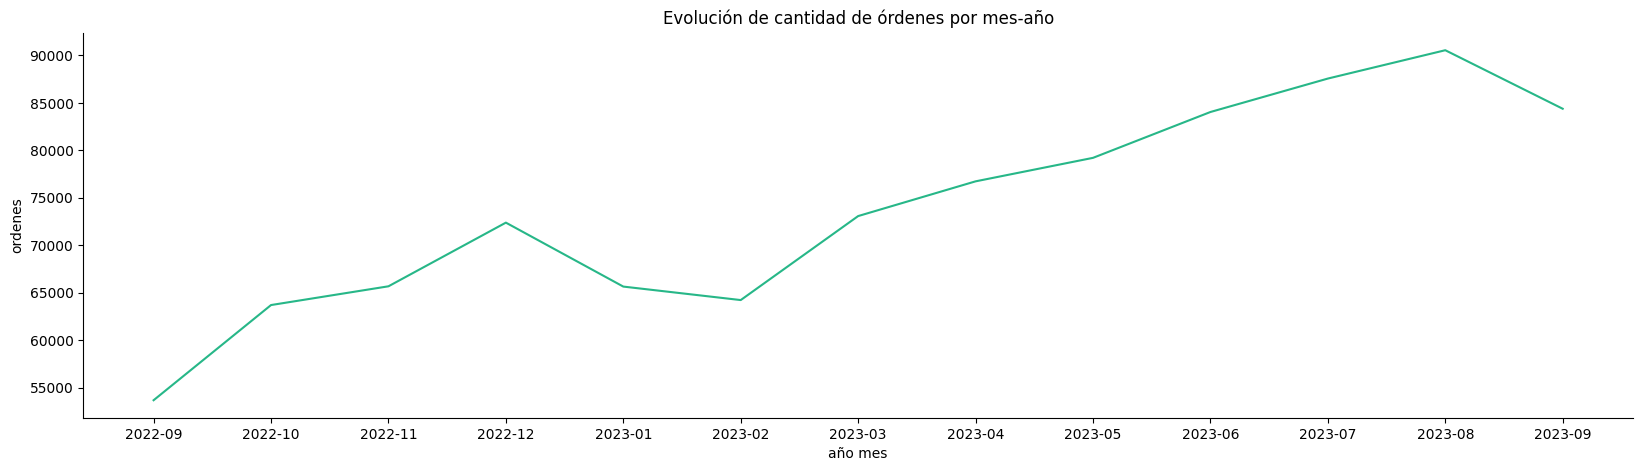

In [ ]:
# Generamos e imprimimos gráfico
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x, y , color=('#27B788'))
ax.set_title('Evolución de cantidad de órdenes por mes-año')
ax.set_ylabel('ordenes')
ax.set_xlabel('año mes')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Mediante este gráfico, observamos la evolución de las órdenes totales de las tiendas analizadas.
Durante los últimos meses del 2022, se percibe un aumento en la demanda. Sin embargo, en los primeros dos meses del año siguiente, se constata una disminución. Posteriormente, a partir de marzo, se observa un crecimiento en la cantidad de órdenes, sosteniendo una tendencia creciente de las mismas hasta septiembre.
Estos patrones temporales ofrecen una visión clara de la dinámica cambiante de la demanda a lo largo del tiempo

**Gráfico: Cantidad de órdenes por día de la semana**

In [ ]:
# Agrupamos los datos de forma tal de obtener las ordenes por día de la semana
df_orders_por_dia= df.groupby(['dia_semana'])['order_id'].nunique().to_frame(name = 'ordenes').reset_index()

In [ ]:
# Definimos variables 'x' y 'y'
x = df_orders_por_dia.dia_semana
y = df_orders_por_dia.ordenes

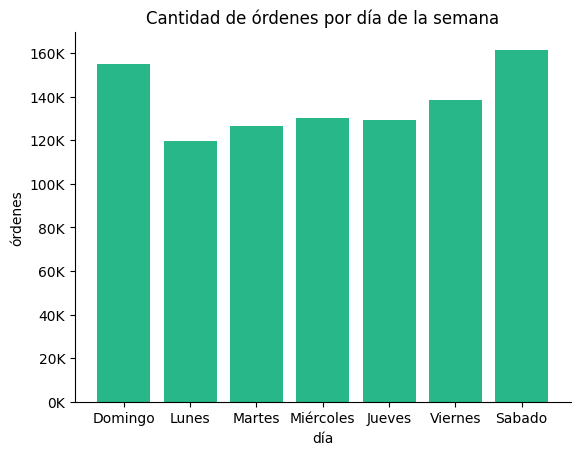

In [ ]:
from matplotlib.ticker import FuncFormatter

# Generamos e imprimimos gráfico
fig, ax = plt.subplots()
ax.bar(x, y, color=('#27B788'))
ax.set_title('Cantidad de órdenes por día de la semana')
ax.set_ylabel('órdenes')
ax.set_xlabel('día')

# Asignamos nombres de días de la semana
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sabado']  # Ejemplo de nombres de días
ax.set_xticks(x)
ax.set_xticklabels(dias_semana)

# Eliminamos los bordes derecho y superior del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Formateamos los valores del eje y en miles
def format_thousands(x, pos):
    return f'{x/1000:.0f}K'

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

plt.show()


Desde la interpretación del análisis gráfico, que los días de mayor actividad de ventas corresponden a los fines de semana (recordar que día 1 es el domingo).

De lunes a jueves, se destaca que el miércoles se posiciona como el día con el mayor número de órdenes
A partir del viernes, se observa un incremento en la cantidad de órdenes, alcanzando su punto máximo durante el fin de semana. Este patrón sugiere una tendencia creciente de compra fuerte hacia el final de la semana.

**Gráfico: Distribución de cantidad de órdenes por tipo tienda**

In [ ]:
# Agrupamos los datos de forma tal de obtener las ordenes por día de la semana
df_ordenes_por_tipo_tienda = df.groupby(['tipo_tienda'])['order_id'].nunique().to_frame(name = 'ordenes').reset_index()

In [ ]:
# Definimos variables 'x' y 'y'
x = df_ordenes_por_tipo_tienda.tipo_tienda
y = df_ordenes_por_tipo_tienda.ordenes

Text(0.5, 1.0, 'Distribución de órdenes por tipo de tienda')

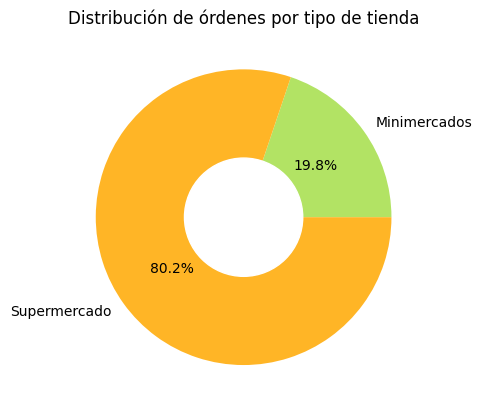

In [ ]:
# Generamos e imprimimos gráfico
fig,ax = plt.subplots()
ax.pie(df_ordenes_por_tipo_tienda.ordenes, labels = df_ordenes_por_tipo_tienda.tipo_tienda ,autopct='%1.1f%%', colors=('#B2E364','#FFB526'))
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax.set_title('Distribución de órdenes por tipo de tienda')

En el gráfico anterior, se aprecia la distribución de las órdenes según el tipo de tienda. Con un importante dominio, los supermercados capturan el 80% del total de órdenes, dejando un 20% restante para las tiendas clasificadas como minimercados.

**Gráfico: Cantidad de productos demandados por categoría**

In [ ]:
# Agrupamos los datos de forma tal de obtener la cantidad de productos según su tipo
df_productos_por_categoria = df.groupby(['tipo_producto'])['identificar_producto'].nunique().to_frame(name = 'cantidad_productos').reset_index()

In [ ]:
# Definimos variables 'x' y 'y'
x = df_productos_por_categoria.tipo_producto
y = df_productos_por_categoria.cantidad_productos

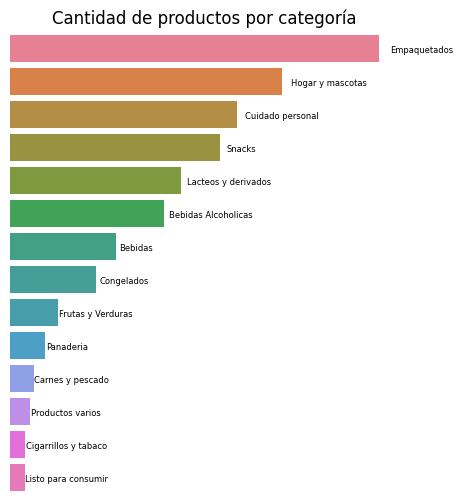

In [ ]:
# Ordenamos el DataFrame por cantidad de productos de manera descendente
df_productos_por_categoria_sorted = df_productos_por_categoria.sort_values(by='cantidad_productos', ascending=False)

# Definimos una paleta de colores con la longitud adecuada
colores = sns.color_palette("husl", len(df_productos_por_categoria_sorted))

# Generamos e imprimimos gráfico
fig, ax = plt.subplots(figsize=(5, 6))

# Trazamos el gráfico de barras con Seaborn y asignamos 'tipo_producto' a 'hue'
g = sns.barplot(data=df_productos_por_categoria_sorted, y='tipo_producto', x='cantidad_productos', hue='tipo_producto', palette=colores, dodge=False)

# Ocultamos etiquetas y bordes
g.set_xticklabels([])
g.set_yticklabels([])
g.set(xlabel=None, ylabel=None)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.spines['bottom'].set_visible(False)
g.spines['left'].set_visible(False)
g.tick_params(left=False)
g.tick_params(bottom=False)

# Añadimos etiquetas de valores al lado de las barras
index = 0
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width() / 0.97, p.get_y() + 0.55 * p.get_height(),
             df_productos_por_categoria_sorted.tipo_producto.iloc[index],
             ha='left', va='center', color='black', fontsize='6')
    index += 1

# Título del gráfico
ax.set_title('Cantidad de productos por categoría')

plt.show()

Al analizar el gráfico, se destaca que la categoría 'Empaquetados' encabeza la lista en términos de la mayor cantidad de productos diferentes demandados. En segundo lugar, encontramos las categorías 'Hogar y Mascotas' y 'Cuidado Personal'.

Es importante aclarar que esta información se refiere a la distribución de productos distintos por categoría, es decir, 'Empaquetados' lidera en variedad, ofreciendo la selección más amplia de productos dentro de la tienda, pero no quiere decir que esta categoria de productos sea la más demanda.

**Gráfico: Evolución de órdenes por tipo de tienda**

In [ ]:
# Agrupamos los datos de forma tal de obtener para cada año-mes y tipo de tienda, la cantidad de órdenes
df_evolucion_tipo_orden = df.groupby(['ano_mes','tienda_importante'])['order_id'].nunique().to_frame(name = 'ordenes').reset_index()

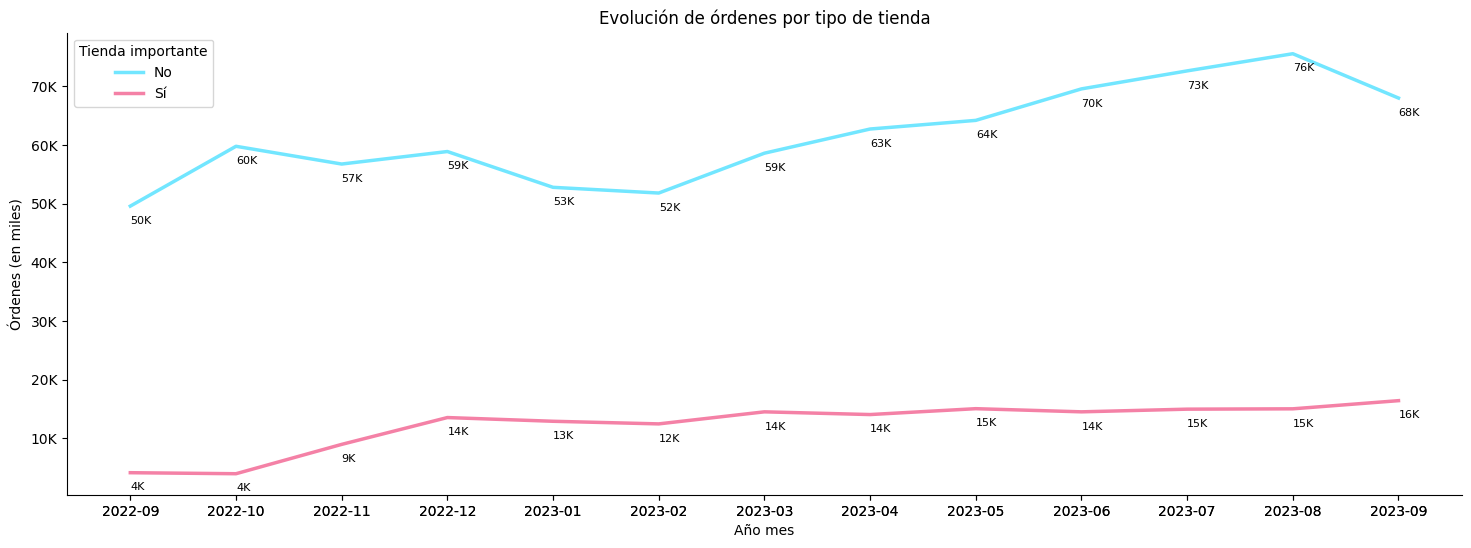

In [ ]:
def format_thousands(x, pos):
    return '{:,.0f}K'.format(x/1000)

# Modificamos el DataFrame para cambiar los valores de "tienda_importante" a "Sí" y "No"
df_evolucion_tipo_orden['tienda_importante'] = df_evolucion_tipo_orden['tienda_importante'].map({0: 'No', 1: 'Sí'})

# Generamos e imprimimos gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Definimos una paleta de colores personalizada
colores = ['#72E6FF', '#F481A6']

sns.lineplot(x=df_evolucion_tipo_orden.ano_mes, y=df_evolucion_tipo_orden.ordenes, hue=df_evolucion_tipo_orden.tienda_importante, ax=ax, palette=colores, linewidth=2.5)

plt.xticks(df_evolucion_tipo_orden.ano_mes)

for x, y, imp in zip(df_evolucion_tipo_orden.ano_mes, df_evolucion_tipo_orden.ordenes, df_evolucion_tipo_orden.tienda_importante):
    plt.text(x=x, y=y - 3000, s='{:.0f}K'.format(y/1000), fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Evolución de órdenes por tipo de tienda')
ax.set_ylabel('Órdenes (en miles)')
ax.set_xlabel('Año mes')

# Aplicamos la función de formato al eje y
formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

# Cambiamos la leyenda de la tienda importante
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Tienda importante')

plt.show()

A partir de este gráfico, se observa que las tiendas designadas como 'importantes' (tienda_importante=1) han experimentado un crecimiento más moderado en el número de órdenes durante el periodo analizado.

En contraste, las tiendas clasificadas como 'no importantes' (tienda_importante=0) han experimentado más variaciones en sus niveles de órdenes a lo largo de los meses. Se observa un descenso entre octubre de 2022 y febrero de 2023, seguido de un crecimiento significativo durante varios meses, para luego experimentar otro descenso en septiembre de 2023.

**Gráfico: Distribución por hora y tipo de cliente**

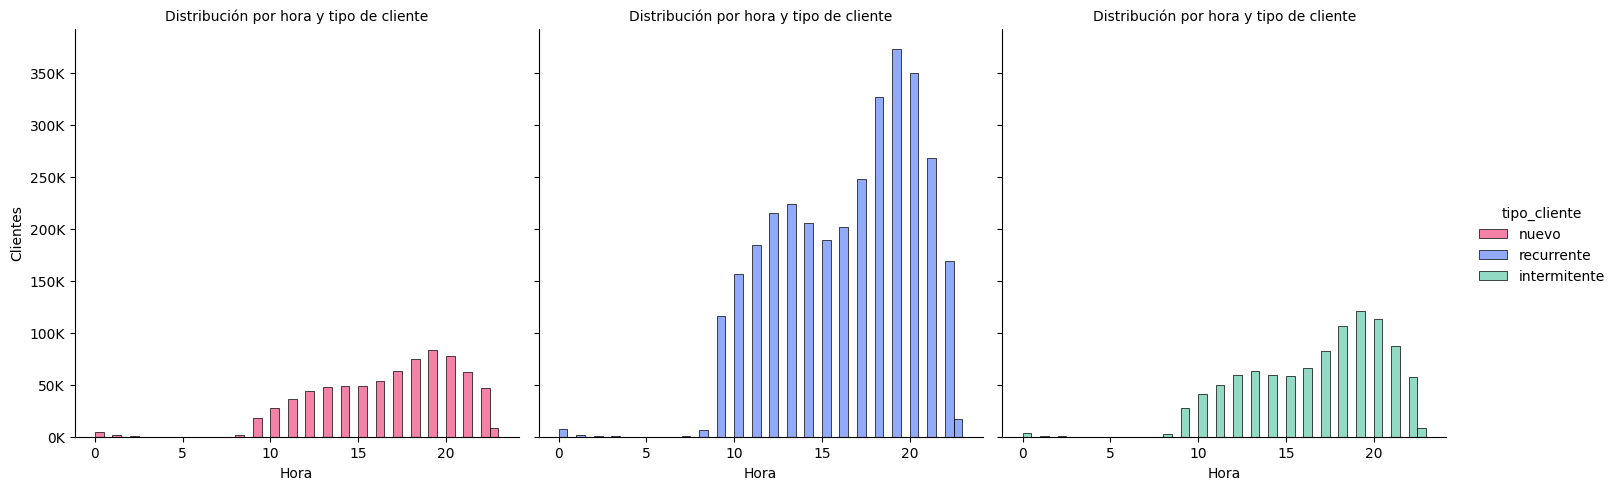

In [ ]:
def format_thousands(x, pos):
    return '{:,.0f}K'.format(x/1000)

# Definir una paleta de colores personalizada
colores = ["#EA044E", "#2656F7", "#27B788"]  # Por ejemplo, naranja y verde

# Generamos e imprimimos el gráfico con colores personalizados
g = sns.displot(data=df, x="hora", hue="tipo_cliente", col="tipo_cliente", palette=colores, linewidth=0.5, binwidth=0.5)


# Personalizamos título y etiquetas de ejes
g.set_axis_labels("Hora", "Clientes")
g.set_titles("Distribución por hora y tipo de cliente")

# Obtenemos los ejes
axes = g.axes.flatten()

# Aplicamos el formato de miles al eje y
for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

De los gráficos anteriores, se deduce que el comportamiento de compra según el tipo de cliente y la hora presenta similitudes generales:se observa un pico de actividad de compra que se ubica entre las 18:00 y las 20:00 horas.

No obstante, es relevante destacar que los clientes nuevos exhiben una distribución más uniforme a lo largo de las horas del día, en contraste con los clientes recurrentes. Estos últimos muestran una concentración más pronunciada de compras durante el mencionado intervalo horario, sugiriendo posiblemente patrones de comportamiento más consolidados y predecibles en comparación con la audiencia de clientes nuevos.








In [ ]:
pd.crosstab(df['tipo_cliente'], df['tipo_producto'], normalize='index', margins=True, margins_name='Total')

tipo_producto,Bebidas,Bebidas Alcoholicas,Carnes y pescado,Cigarrillos y tabaco,Congelados,Cuidado personal,Empaquetados,Frutas y Verduras,Hogar y mascotas,Lacteos y derivados,Listo para consumir,Panaderia,Productos varios,Snacks
tipo_cliente,,,,,,,,,,,,,,
intermitente,0.12,0.01,0.02,0.04,0.05,0.03,0.11,0.13,0.05,0.16,0.01,0.09,0.00,0.18
nuevo,0.12,0.01,0.03,0.03,0.05,0.04,0.12,0.11,0.05,0.16,0.01,0.07,0.00,0.20
recurrente,0.12,0.01,0.03,0.05,0.04,0.03,0.11,0.14,0.06,0.16,0.01,0.09,0.00,0.15
Total,0.12,0.01,0.03,0.05,0.05,0.03,0.11,0.13,0.06,0.16,0.01,0.09,0.00,0.16



El análisis de la tabla anterior revela patrones interesantes en el comportamiento de la demanda de productos según el tipo de clientes. Se observa que los clientes nuevos tienden a mostrar una mayor preferencia por productos de la categoría "Snacks" y "Bebidas Alcohólicas". Por otro lado, los clientes recurrentes muestran una inclinación hacia productos de las categorías "Cigarros y Tabaco" y "Frutas y Verduras".

Estos hallazgos sugieren que existe una variabilidad significativa en las preferencias de compra entre distintos segmentos de clientes.

##  Visualizaciones que evidencian nuestra hipotesis







Dada la amplitud del conjunto de productos que componen la base de datos, optamos, en esta instancia, por focalizar nuestra atención en uno específico para llevar a cabo visualizaciones más detalladas y discernir patrones más claros.

El producto elegido para este analisis es la Leche Manjar Base Colun 1 L (identificador de producto = 7802920007151).

El siguiente analisis pretende ahondar en la comprensión de la dinámica de precios de este artículo, proporcionando valiosos insights para los analisis que siguen.



### Aproximación a un caso de analísis: Leche Manjar Base Colun 1 L

---

In [ ]:
# Filtramos y generamos un nuevo data frame donde sólo se considera un producto para el analisis
filtro = df['identificar_producto'] == 7802920007151
df_filtrado = df[filtro]
print(df_filtrado.nombre_producto)

77624      Leche Manjar Base Colun 1 L
89545      Leche Manjar Base Colun 1 L
102122     Leche Manjar Base Colun 1 L
158133     Leche Manjar Base Colun 1 L
193760     Leche Manjar Base Colun 1 L
                      ...             
4495858    Leche Manjar Base Colun 1 L
4623839    Leche Manjar Base Colun 1 L
4817480    Leche Manjar Base Colun 1 L
4952363    Leche Manjar Base Colun 1 L
4955650    Leche Manjar Base Colun 1 L
Name: nombre_producto, Length: 89, dtype: object


**Gráfico: Histograma de precios**

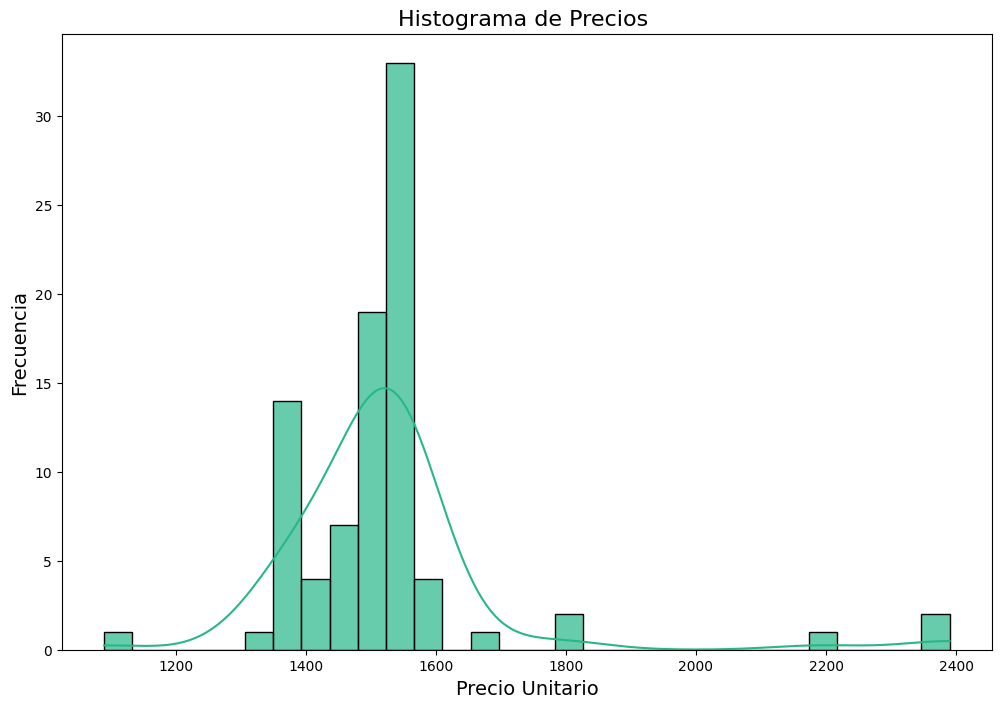

In [ ]:
# Generamos e imprimimos gráfico histplot
plt.figure(figsize=(12, 8))

sns.histplot(df_filtrado, x='precio_unitario',  bins=30, kde=True, alpha=0.7, color='#27B788')

plt.title('Histograma de Precios ', fontsize=16)
plt.xlabel('Precio Unitario', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

Del análisis del histograma de precios para el producto seleccionado, se constata una amplia variabilidad en los precios: desde 1100 hasta 2400 pesos. No obstante, vale la pena destacar que la mayor concentración de ventas se da en el rango de precios comprendido entre 1400 y 1600 pesos.

Debemos señalar que estos precios corresponden a un periodo de un año. En consecuencia, es posible que la disparidad en los precios no solo refleje las diferencias entre tiendas, sino que también pueda estar influenciada por factores macroeconómicos, como la inflación. Específicamente, el rango observado podría incluir ajustes de precios atribuibles a las condiciones económicas generales, más allá de las estrategias individuales de fijación de precios por parte de las tiendas.
También es relevante destacar que, en los extremos de la distribución, los precios inferiores a 1200 y superiores a 2200 podrían considerarse como valores atípicos. Sin embargo, esto no necesariamente implica que sean errores, sino que podrían ser el resultado de circunstancias particulares o estrategias de precios específicas de algunas tiendas.


In [ ]:
# Generamos e imprimimos deciles de precios del producto analizado
deciles_precio = df_filtrado[['precio_unitario']].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
nombres_deciles = {
    0.1: 'Decil 10',
    0.2: 'Decil 20',
    0.3: 'Decil 30',
    0.4: 'Decil 40',
    0.5: 'Mediana (Decil 50)',
    0.6: 'Decil 60',
    0.7: 'Decil 70',
    0.8: 'Decil 80',
    0.9: 'Decil 90'
}

deciles_precio = deciles_precio.rename(index=nombres_deciles)

print(deciles_precio)


                    precio_unitario
Decil 10                   1,390.00
Decil 20                   1,422.00
Decil 30                   1,514.00
Decil 40                   1,520.00
Mediana (Decil 50)         1,520.00
Decil 60                   1,540.00
Decil 70                   1,540.00
Decil 80                   1,540.00
Decil 90                   1,540.00


El análisis de los deciles de precios respalda la observación previa. Aunque la mayoría de los productos demandados se concentran alrededor de un precio cercano a los 1530 pesos, se identifica un rango considerable de valores. Este fenómeno sugiere que, si bien existe una tendencia general hacia ciertos niveles de precios, la distribución de los precios de los productos es amplia y diversa.

Estos hallazgos destacan la importancia de reconocer la variabilidad en los precios y señalan la presencia de productos que pueden tener un atractivo significativo en diferentes segmentos de precios. Este entendimiento más detallado de la distribución de precios puede ser valioso para estrategias de fijación de precios, segmentación de mercado y decisiones estratégicas relacionadas con la oferta de productos.

**Gráfico: Evolución de precios a lo largo del tiempo**

In [ ]:
# Agrupamos los datos de forma tal de obtener para cada año-mes el precio promedio, el precio maximo y el precio mínimo del producto analizado
df_evolucion_tipo_orden = df_filtrado.groupby(['ano_mes'])['precio_unitario'].agg(['mean', 'min', 'max']).reset_index()

df_evolucion_tipo_orden.columns = ['ano_mes', 'precio_promedio', 'precio_minimo', 'precio_maximo']

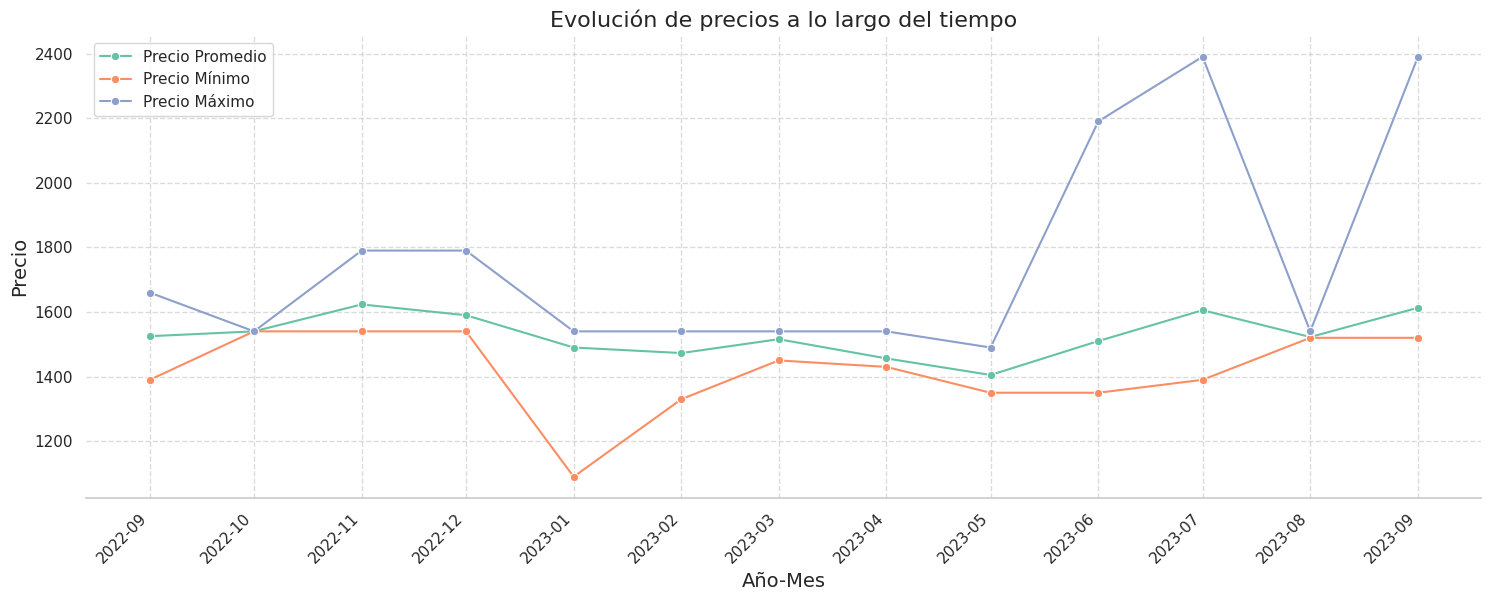

In [ ]:
# Generamos e imprimimos gráfico lineplot
df_evolucion_tipo_orden['ano_mes'] = pd.to_datetime(df_evolucion_tipo_orden['ano_mes'])

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(18, 6))

sns.lineplot(data=df_evolucion_tipo_orden, x='ano_mes', y='precio_promedio', label='Precio Promedio', marker='o')
sns.lineplot(data=df_evolucion_tipo_orden, x='ano_mes', y='precio_minimo', label='Precio Mínimo', marker='o')
sns.lineplot(data=df_evolucion_tipo_orden, x='ano_mes', y='precio_maximo', label='Precio Máximo', marker='o')

plt.title('Evolución de precios a lo largo del tiempo', fontsize=16)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.grid(axis='both', which='major', linestyle='--', alpha=0.7)  # Quitar tanto las cuadrículas verticales como horizontales

sns.despine(left=True, right=True)

plt.show()

Con el propósito de explorar la dispersión de precios en distintos momentos del tiempo y comprender su evolución a lo largo del tiempo, el gráfico previo ofrece una visión  de tres categorías de precios para el producto de análisis: el precio mínimo, el precio promedio y el precio máximo.

Con la excepción de dos meses específicos en el año (octubre de 2022 y agosto de 2023), donde se observa una convergencia entre estos tres precios, en los demás periodos analizados se evidencian divergencias importantes. Estas diferencias se alinean de manera consistente con la hipótesis inicialmente planteada, subrayando la variabilidad significativa en los precios a lo largo del tiempo y por tienda.

Este patrón refuerza la noción de que existen factores dinámicos y contextuales que influyen en la fijación de precios, validando la hipótesis de estacionalidad, disponibilidad del producto y estrategias comerciales propias de cada tienda. Los dos meses de escasa diferencia entre precios podrían ser objeto de un análisis más detenido para comprender las condiciones particulares que llevaron a esta convergencia temporal.



**Gráfico: Distribución por precio unitario, agrupado por Tipo de Cliente**

<ipython-input-72-05626d8c6bf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ano_mes'] = pd.to_datetime(df_filtrado['ano_mes'])


<Figure size 1800x600 with 0 Axes>

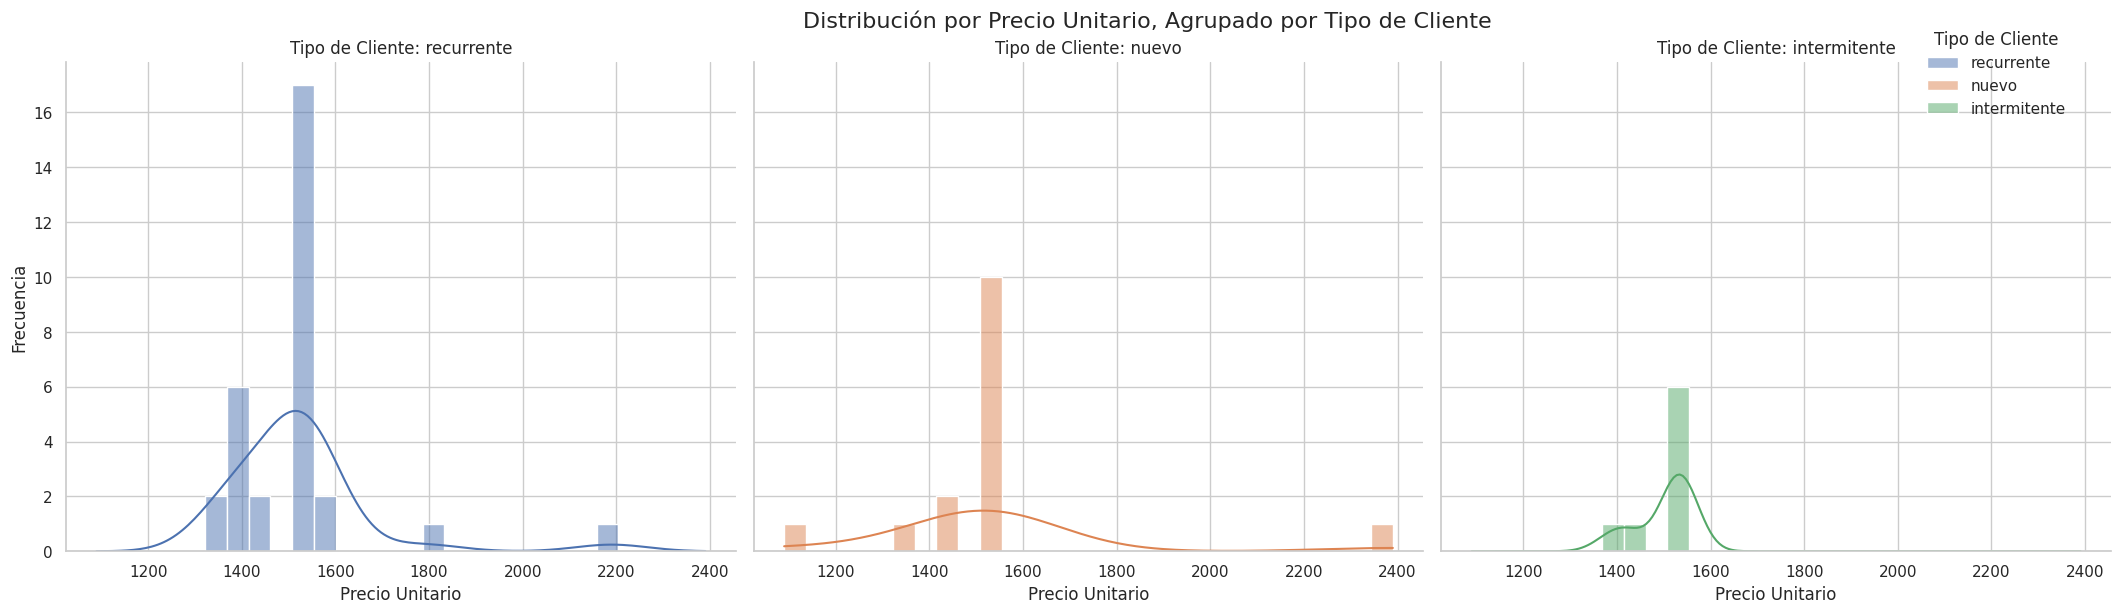

In [ ]:
# Generamos e imprimimos gráfico displot

df_filtrado['ano_mes'] = pd.to_datetime(df_filtrado['ano_mes'])

sns.set(style="whitegrid", palette="deep")

plt.figure(figsize=(18, 6))
g = sns.displot(
    data=df_filtrado,
    x='precio_unitario',
    hue='tipo_cliente',
    col='tipo_cliente',
    kde=True,
    height=6,  # Ajusta la altura del gráfico
    aspect=1.2,  # Ajusta la relación de aspecto
)

g.fig.suptitle('Distribución por Precio Unitario, Agrupado por Tipo de Cliente', y=1.02, fontsize=16)
g.set_axis_labels('Precio Unitario', 'Frecuencia')
g.set_titles('Tipo de Cliente: {col_name}')

g._legend.set_title('Tipo de Cliente')
g._legend.set_bbox_to_anchor([0.9, 0.9])

plt.show()

Los gráficos previos reafirman la premisa establecida en nuestra hipótesis: para un mismo producto, coexisten distintos niveles de precios, y, adicionalmente, observamos variaciones en la demanda según el tipo del cliente. Es evidente que los clientes recurrentes tienden a incurrir en costos más elevados por el producto en comparación con los clientes nuevos o intermitentes.

La distribución de precios para los clientes recurrentes exhibe una mayor dispersión, sugiriendo una variedad más amplia de precios. Por otro lado, la distribución de precios para clientes nuevos o intermitentes muestra una forma de campana más suave y uniforme, indicando una menor variabilidad en los precios. Esta diferencia en la forma de las distribuciones refleja la tendencia de los clientes recurrentes a aceptar precios más elevados, posiblemente como resultado de la lealtad a la marca o la percepción de valor acumulada a lo largo del tiempo.

De este análisis se desprende la importancia de personalizar estrategias de precios según el comportamiento del cliente. La comprensión de las preferencias y tolerancias de precios de diferentes segmentos de clientes puede guiar decisiones estratégicas para optimizar la rentabilidad y la satisfacción del cliente. En resumen, al reconocer las disparidades en la disposición a pagar entre clientes recurrentes y nuevos, se abre la puerta a estrategias más efectivas de fijación de precios y gestión de relaciones con clientes.


**Gráfico: Distribución de precios por tipo de compra**

<ipython-input-69-267c86ec2bd0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_compra', y='precio_unitario', data=df_filtrado, showfliers=False, width=0.5, linewidth=1.5, palette=colores)


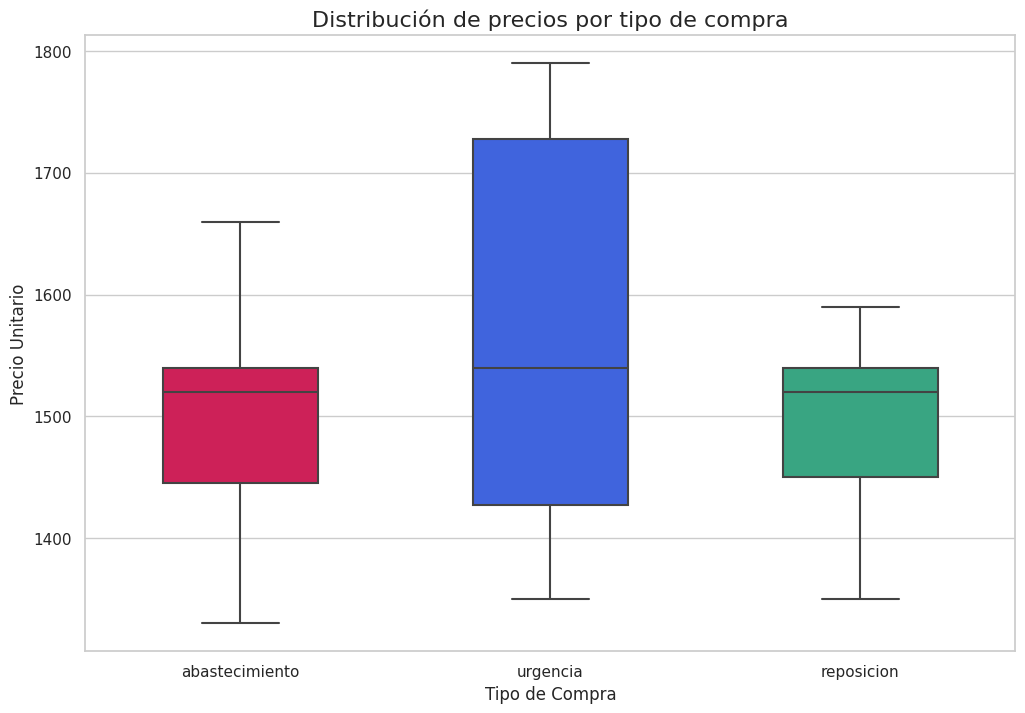

In [ ]:
# Definimos una paleta de colores personalizada
colores = ["#EA044E", "#2656F7", "#27B788"]

# Generamos e imprimimos gráfico boxplot
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(12, 8))

sns.boxplot(x='tipo_compra', y='precio_unitario', data=df_filtrado, showfliers=False, width=0.5, linewidth=1.5, palette=colores)

plt.title('Distribución de precios por tipo de compra', fontsize=16)
plt.xlabel('Tipo de Compra')
plt.ylabel('Precio Unitario')

plt.show()

Como también postulamos en nuestra hipótesis, la disposición a pagar por un producto puede variar dependiendo de la naturaleza de la necesidad de compra. Este fenómeno queda claramente corroborado en el gráfico anterior, donde los clientes que realizan compras con una necesidad "Urgente" presentan una mayor dispersión en los precios, así como una mediana significativamente más alta.

En contraste, los clientes que adquieren productos con el propósito de 'Abastecimiento' presentan precios más bajos en comparación con los de la categoría "Urgente". Sin embargo, aquellos que compran con la finalidad de 'Reposición' son quienes pagan los precios más bajos. Esta categoría no solo tiene la mediana más baja, sino que también muestra la menor dispersión de precios.

Esta observación resalta la influencia directa que el contexto y la motivación de compra tienen en la disposición a pagar. Mientras que las compras consideradas "Urgentes" pueden justificar precios más altos debido a la necesidad inmediata, las compras de reposición o abastecimiento, orientadas a la planificación a largo plazo, tienden a asociarse con precios más bajos y una mayor predictibilidad en los precios.

En conclusión, se evidencia la importancia de comprender las motivaciones de compra para una gestión efectiva de precios y una experiencia del cliente más satisfactoria.







**Gráfico: Precios vs Unidades**

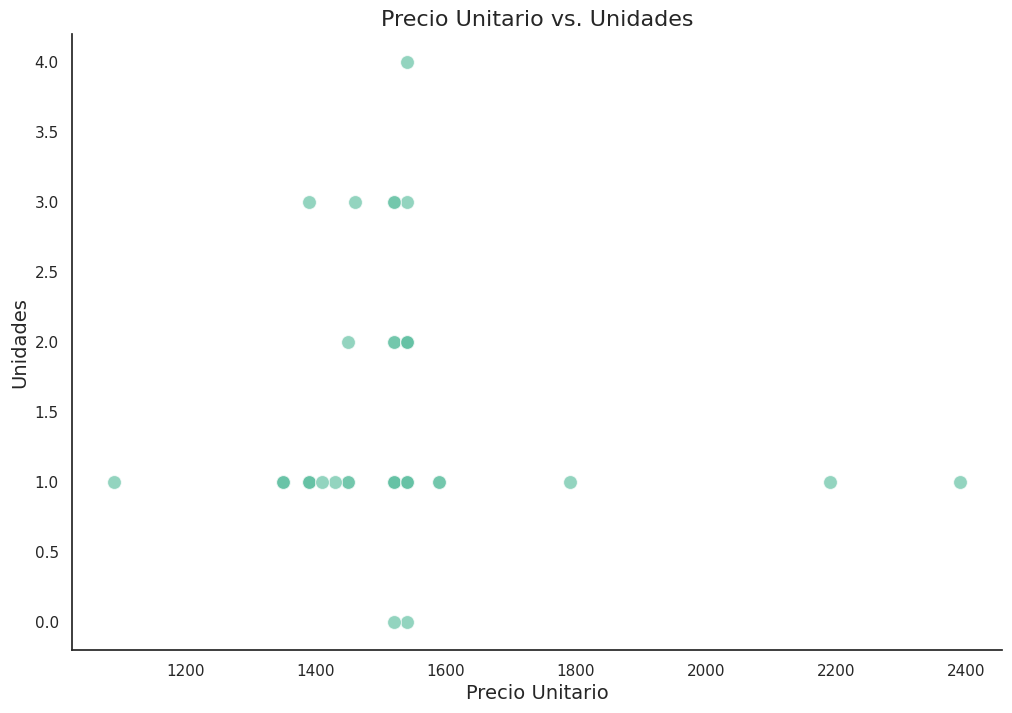

In [ ]:
# Generamos e imprimimos gráfico scatterplot
sns.set(style="white", palette="Set2")

plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_filtrado, x='precio_unitario', y='unidades', alpha=0.7, s=100)

plt.title('Precio Unitario vs. Unidades', fontsize=16)
plt.xlabel('Precio Unitario', fontsize=14)
plt.ylabel('Unidades', fontsize=14)

sns.despine()

plt.show()

A partir del análisis gráfico mediante un scatterplot entre las unidades demandadas y los precios, emerge la observación de que no se percibe una relación clara entre los precios y las unidades demandadas para estos productos. Esta aparente falta de correlación puede atribuirse a diversas razones.

En primer lugar, al tratarse de productos de primera necesidad, es posible que el precio no sea un factor determinante tan pronunciado en la decisión de compra. Por otro lado, la limitada variabilidad en la demanda de unidades, con un máximo de 4 unidades, también podría contribuir a la falta de una relación clara entre precios y unidades. La restricción en la cantidad de unidades demandadas puede impedir la identificación de patrones significativos en el comportamiento de compra.

Para obtener conclusiones más robustas en este aspecto, sería prudente profundizar en el análisis y avanzar hacia un estudio de elasticidades. Este enfoque más detallado permitirá evaluar de manera más precisa cómo las variaciones en los precios impactan la cantidad demandada, proporcionando información valiosa sobre la sensibilidad de los consumidores a los cambios de precio.

En resumen, la aparente falta de relación en el scatterplot subraya la complejidad de los factores que influyen en las decisiones de compra para determinados productos. La transición a un análisis de elasticidades abrirá la puerta a una comprensión más profunda de las interacciones entre precios y demanda, facilitando así una toma de decisiones más informada en estrategias de fijación de precios.

# **Modelado**

**Preparando los datos**




In [ ]:
# Reducimos el tamaño de la base de datos para que ejecute el modelo
df = df.sample(frac=0.1, random_state=42)

cantidad_filas = df.shape[0]
print("Cantidad de filas en el DataFrame:", cantidad_filas)

Cantidad de filas en el DataFrame: 501281


In [ ]:
# Generamos a partir de la variable Fecha, dos nuevas variables que sean año y mes para poder incorporarlas al modelo
df_resultado['fecha'] = pd.to_datetime(df_resultado['fecha'])
df_resultado['año'] = df_resultado['fecha'].dt.year
df_resultado['mes'] = df_resultado['fecha'].dt.month

## **Encoding (Codificación):  Label Encoding**

LabelEncoder proporciona una solución al convertir automáticamente las etiquetas de texto en números. La idea básica es asignar un número único a cada etiqueta única presente en los datos.

In [ ]:
# Aplicamos Label Encoding para transformar las variables categóricas en valores numericos
le = LabelEncoder()

df_resultado['tipo_tienda_numerico'] = le.fit_transform(df_resultado['tipo_tienda'])
df_resultado['tienda_importante_numerico'] = le.fit_transform(df_resultado['tienda_importante'])
df_resultado['tipo_cliente_numerica'] = le.fit_transform(df_resultado['tipo_cliente'])
df_resultado['tipo_compra_numerica'] = le.fit_transform(df_resultado['tipo_compra'])
df_resultado['tipo_producto_numerica'] = le.fit_transform(df_resultado['tipo_producto'])

df_2 = df_resultado.drop('fecha', axis=1)


# Seleccionamos, para incoporar en modelo, solo las columnas numéricas
df_numeric = df_2.select_dtypes(include=['number'])

df_numeric2 = df_numeric.drop('importe_descuento', axis=1)

In [ ]:
# Definimos 'x' y 'y'

# y: precio_unitario
y = df_numeric2.iloc[:,8]
# X: Todas las columnas, menos precio_unitario
X = df_numeric2.drop(df_numeric2.columns[8], axis=1)

**Dividimos el dataset en conjunto de entrenamiento y prueba**

La división de datos en conjuntos de entrenamiento y prueba es una práctica crucial en el aprendizaje automático por las siguientes razones:

- Evaluación del rendimiento del modelo:
Permite medir qué tan bien el modelo generaliza a datos no vistos al aprender patrones en el conjunto de entrenamiento y aplicarlos al conjunto de prueba.

- Evitar el sobreajuste (overfitting):
Previene que el modelo memorice los datos de entrenamiento y, en cambio, aprenda patrones generales, evitando así el sobreajuste que puede afectar la capacidad del modelo para generalizar.

- Mejorar la evaluación de hiperparámetros:
Facilita la selección y ajuste de hiperparámetros, ya que se dispone de un conjunto de prueba independiente para evaluar el rendimiento del modelo con configuraciones ajustadas.

- Simular la aplicación del modelo en el mundo real:
Replica las condiciones del mundo real al exponer el modelo a datos nuevos durante la evaluación, proporcionando una estimación realista de su rendimiento fuera del conjunto de entrenamiento.

In [ ]:
# Dividimos el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Engineering: Reducción de dimensionalidad**

Utilizaremos Análisis de Componentes Principales (PCA) para reducir la complejidad de los datos mientras se retiene la mayor cantidad posible de información importante.

PCA es una técnica matemática que nos permite transformar nuestros datos en un nuevo conjunto de variables, conocidas como componentes principales. Estos componentes principales son una combinación lineal de las variables originales y se seleccionan de tal manera que capturen la mayor cantidad posible de variación en los datos.

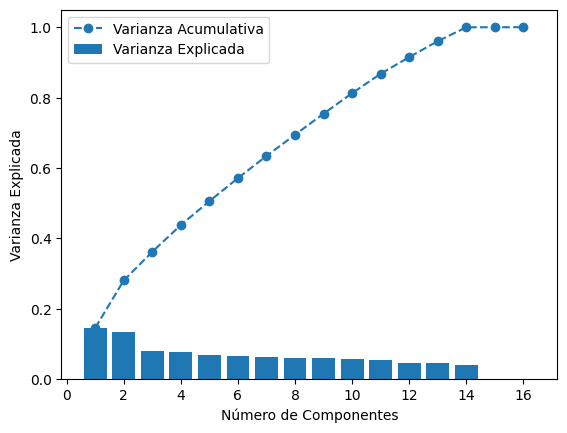

In [ ]:
from sklearn.decomposition import PCA # Reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad posible de la variabilidad original
from sklearn.preprocessing import StandardScaler # Estandarizar las características de un conjunto de datos

# Centramos y escalar los datos
X_scaled = StandardScaler().fit_transform(X_train)

# Inicializamos y ajustar PCA
pca = PCA()
pca.fit(X_scaled)

# Obtenemos varianza explicada y acumulada
varianza = pca.explained_variance_ratio_
var_acum = np.cumsum(varianza)

# Graficamos  la varianza explicada y acumulativa
plt.bar(range(1, len(varianza) + 1), varianza, label='Varianza Explicada')
plt.plot(range(1, len(varianza) + 1), var_acum, label='Varianza Acumulativa', marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.legend()
plt.show()

Vemos que a partir de los 10 componentes se acumula más del 80% de la varianza por eso es que terminamos utilizando este valor como valor optimo de cantidad de componentes

In [ ]:
pca = PCA(n_components=10)  # Especificamos 10 como el número de componentes principales deseados

# Ajustamos y transformar los datos
X_pca = pca.fit_transform(X_scaled)

# Creamos un DataFrame para visualizar los resultados
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3', 'Componente Principal 4', 'Componente Principal 5', 'Componente Principal 6', 'Componente Principal 7', 'Componente Principal 8', 'Componente Principal 9', 'Componente Principal 10'])
df_pca['Etiqueta'] = y

# Visualizamos el DataFrame resultante
print(df_pca.head())

   Componente Principal 1  Componente Principal 2  Componente Principal 3  \
0                0.439526               -0.539952               -1.468716   
1               -0.390783               -0.988361                0.664912   
2                0.312702               -0.389461               -2.181854   
3               -0.636695               -1.211544                0.423367   
4               -0.199517               -1.123457               -1.806803   

   Componente Principal 4  Componente Principal 5  Componente Principal 6  \
0                0.000004               -0.959598                0.821759   
1               -0.169834                1.120957               -0.221430   
2               -0.615756                0.474634                0.137124   
3                2.120082                0.875353                0.340453   
4                1.282597               -0.176501               -0.880303   

   Componente Principal 7  Componente Principal 8  Componente Principal 9 

**Otras opciones de Feature Engineering - Agregar interacciones de características**

Agregamos nuevas variables que representen interacciones entre características existentes. Esto puede capturar relaciones no lineales que pueden ser importantes para el modelo.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Crear interacciones de características polinómicas
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)

# Agregar características polinómicas al conjunto de datos
X_train_extended = np.concatenate([X_train_scaled, X_train_poly[:, 1:]], axis=1)

## **Entrenamiento modelos de Machine Learning**

**Modelo de regresion lineal**

La regresión lineal es una técnica estadística utilizada en machine learning y análisis de datos para modelar la relación lineal entre una variable dependiente (o respuesta) y una o más variables independientes (o características).

Es comúnmente utilizada en tareas de predicción y análisis de tendencias.


In [ ]:
from sklearn.linear_model import LinearRegression # Importa la clase LinearRegression de scikit-learn, que se utiliza para crear y entrenar modelos de regresión lineal.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Importa varias métricas de evaluación de regresión que se utilizarán para evaluar el rendimiento del modelo

# Inicializamos el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenamos el modelo
regression_model.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)


In [ ]:
# Evaluamos el rendimiento del modelo a traves de Error Cuadrático Medio y  Coeficiente de Determinación (R2)
# MSE se centra en la precisión y la magnitud de los errores, el R2 nos brinda información sobre la proporción de variabilidad explicada por el modelo en comparación con la variabilidad total en los datos.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 3178481.9062105343
R-squared: 0.13326238287715253
Mean Absolute Error (MAE): 1227.9678312621663


MSE es  3189241. Esto significa que, en promedio, las predicciones del modelo tienen un error cuadrático medio de alrededor de  3189241. Siendo que nuestra variable a estimar es precio de productos, este valor no tendría sentido.

R² es 0.13127. Esto significa que aproximadamente el 13% de la variabilidad en la variable de respuesta está explicada por el modelo. Un R² bajo sugiere que el modelo no está explicando bien la variabilidad en los datos y puede indicar que el modelo no es muy adecuado para el conjunto de datos.

Dado que estamos tratando de predecir los precios de los productos y el MSE es alto, el modelo actual no está haciendo predicciones precisas en términos de magnitud de error cuadrático medio. Además, el bajo R² indica que el modelo no está capturando adecuadamente la variabilidad presente en los datos.

En resumen, los resultados sugieren que el modelo actual puede no ser el más adecuado para el conjunto de datos, y la búsqueda de alternativas más sofisticadas o adaptadas podría ser beneficiosa para mejorar la capacidad predictiva del modelo.


In [ ]:
# Identificamos posibilidad de que exista overfitting (sobreajuste) o underfitting (subajuste)
# Partimos de las predicciones y valores reales para ambos conjuntos
y_pred_train = regression_model.predict(X_train)
y_pred_test = regression_model.predict(X_test)

# Calculamos MSE para ambos conjuntos
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculamos la diferencia en MSE
diferencia_mse = mse_train - mse_test

print("MSE - Conjunto de Entrenamiento:", mse_train)
print("MSE - Conjunto de Prueba:", mse_test)
print("Diferencia en MSE (Entrenamiento - Prueba):", diferencia_mse)

MSE - Conjunto de Entrenamiento: 3122113.396336193
MSE - Conjunto de Prueba: 3178481.9062105343
Diferencia en MSE (Entrenamiento - Prueba): -56368.50987434108


Una diferencia en el MSE entre los conjuntos de entrenamiento y prueba de 13220.76 indica que el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba. Esto quiere decir que estamos ante una situacion de Overfitting, por lo que el modelo puede estar capturando ruido o detalles específicos de los datos de entrenamiento que no son representativos de la verdadera relación en los datos.

Cómo recomendaciones a implementar que mejoren el modelo, recomendamos probar  técnicas de regularización, ajustar hiperparámetros o reducir la complejidad del modelo..

**Modelo Support Vector Regression (SVR)**

Support Vector Regression (SVR) es una técnica de regresión que utiliza Support Vector Machines (SVM) para modelar relaciones no lineales entre variables. A diferencia de la regresión lineal, SVR puede manejar patrones más complejos mediante la transformación de datos en un espacio de características de mayor dimensión.

SVR se utiliza para realizar tareas de regresión, donde se busca predecir un valor numérico continuo en lugar de una clasificación.

In [ ]:
from sklearn.svm import SVR #  Importa la clase SVR de scikit-learn, que se utiliza para crear y entrenar modelos de regresión mediante Support Vector Regression (SVR)
from sklearn.preprocessing import StandardScaler #  Importa la clase StandardScaler de scikit-learn, que se utiliza para estandarizar las características del conjunto de datos

# Escalamos las características (es importante para SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializamos el modelo SVR
svr_model = SVR(kernel='linear', C=1.0)

# Entrenamos el modelo
svr_model.fit(X_train_scaled, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = svr_model.predict(X_test_scaled)


In [ ]:
# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 3467285.3065469866
R-squared: 0.05450882114207056
Mean Absolute Error (MAE): 1168.7686545034123



* El MSE es relativamente alto, indicando una dispersión considerable en los errores cuadráticos.
* El R² es bajo, sugiriendo que el modelo tiene una capacidad limitada para explicar la variabilidad en los datos de prueba.
* El MAE indica que, en promedio, las predicciones del modelo están desviadas en alrededor de 1168.77 unidades del valor real.

Estos resultados sugieren que el modelo puede necesitar mejoras, ya que la precisión de las predicciones parece ser limitada, algunas de ellas podrían ser:
- optimizar hiperparámetros
- explorar otros modelos
- normaliza las etiquetas si es necesario, por ejemplo, con transformaciones logarítmicas
-entre otras

In [ ]:
# Identificamos posibilidad de que exista overfitting (sobreajuste) o underfitting (subajuste)
# Partimos de las predicciones y valores reales para ambos conjuntos
y_pred_train_svr_model = svr_model.predict(X_train_scaled)
y_pred_test_svr_model = svr_model.predict(X_test_scaled)

# Calculamos MSE para ambos conjuntos
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr_model)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr_model)

# Calculamos la diferencia en MSE
diferencia_mse = mse_train_svr - mse_test_svr

print("MSE - Conjunto de Entrenamiento:", mse_train_svr)
print("MSE - Conjunto de Prueba:", mse_test_svr)
print("Diferencia en MSE (Entrenamiento - Prueba):", diferencia_mse)

**Modelo Random Forest Regressor**

Random Forest Regressor es un algoritmo de aprendizaje automático utilizado para realizar tareas de regresión, es decir, prever valores numéricos continuos. Este algoritmo pertenece a la familia de los "ensambles", que combinan múltiples modelos para mejorar la robustez y la precisión del modelo final. En el caso de RandomForestRegressor, se basa en la construcción de múltiples árboles de decisión y promedia sus predicciones.

Es conocido por su capacidad para manejar datos complejos y proporcionar buenos resultados en una variedad de conjuntos de datos. Es especialmente útil cuando se trabaja con conjuntos de datos grandes y complejos.






In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV # se utiliza para realizar una búsqueda exhaustiva de hiperparámetros mediante validación cruzada
from sklearn.preprocessing import StandardScaler # se utiliza para estandarizar características eliminando la media y escalando a la varianza unitaria

In [ ]:
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Inicializamos el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Inicializamos la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Realizamos la búsqueda en cuadrícula en los datos transformados con PCA
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print(f'Mejores Hiperparámetros: {best_params}')

# Entrenamos el modelo con los mejores hiperparámetros en el conjunto completo de datos
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train, y_train)

Mejores Hiperparámetros: {'max_depth': 20, 'n_estimators': 150}


RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [ ]:
# Realizamos predicciones en el conjunto de prueba
y_pred = best_rf_regressor.predict(X_test)

# Calculamos el coeficiente de determinación (R²)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² en el conjunto de prueba: {r2}')

# Calculamos el error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE en el conjunto de prueba: {mse}')

R² en el conjunto de prueba: 0.6680125972444624
MSE en el conjunto de prueba: 1217457.200312957


El R² con valor 0.67 sugiere que el modelo es relativamente bueno para explicar la variabilidad en el conjunto de prueba.

El valor de MSE indica que, en promedio, los errores cuadráticos entre las predicciones y los valores reales son de aproximadamente 1217457.2, lo cual a priori no parecería tener mucho sentido.

----------------------------------



*Validamos el modelo utilizando la ténica de validación cruzada*

En el contexto de la validación cruzada, el Mean Squared Error (MSE) se calcula para cada fold y se utiliza para evaluar el rendimiento del modelo en diferentes particiones del conjunto de datos.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold # KFold es una clase que divide el conjunto de datos en k pliegues (folds), cross_val_score: función que automatiza el proceso de entrenar y evaluar un modelo utilizando validación cruzada

# Definimos el modelo de Random Forest Regressor con los mejores hiperparámetros
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Definimos la estrategia de validación cruzada (por ejemplo, K-Fold con K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la validación cruzada y obtén los scores negativos de MSE
cv_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# Conviertimos los scores negativos a MSE positivos
cv_mse_scores = -cv_scores

# Mostramos los resultados de la validación cruzada
print("MSE en cada fold de la validación cruzada:")
print(cv_mse_scores)
print("\nPromedio del MSE en la validación cruzada:", np.mean(cv_mse_scores))

MSE en cada fold de la validación cruzada:
[1246045.81811454 1245023.99553914 1229654.94472307 1284869.55544933
 1229282.47914707]

Promedio del MSE en la validación cruzada: 1246975.3585946322


El promedio del MSE nos proporciona una estimación de la calidad del modelo en términos de cuán bien se ajusta y generaliza a datos no vistos. En este caso, el valor parece indicar que el modelo tiene un rendimiento moderado, pero es esencial compararlo con otros modelos o ajustes para tomar decisiones informadas sobre la elección del modelo final.

Como aspectos para mejorar el modelo se podría considerar:
- Ajustar hiperparámetros
- Normalización de Datos

**Concluciones**

Tras evaluar los tres modelos propuestos, se constata que tanto el modelo de regresión lineal como el modelo de SVR parecen incapaces de captar la complejidad inherente al problema ya que muestran métricas de rendimiento bajas.

En contraste, el modelo de Random Forest presenta métricas superiores para la predicción. A pesar de su solidez, existe la oportunidad de perfeccionarlo aún más con el objetivo de potenciar la precisión de las estimaciones.

Como próximos pasos, sugerimos mejorar el modelo mediante el ajuste adicional de hiperparámetros, el análisis detallado de errores en la predicción, y la evaluación/ajuste de la cantidad óptima de componentes principales en la transformación PCA.